In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings('ignore')


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [42]:
# Logging
import logging
# Setup logging
logging.basicConfig(filename='/kaggle/working/model_evaluation.log', level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')

In [43]:
data=pd.read_csv('/content/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [45]:
data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [46]:
print("Dataset Shape:", data.shape)
print("\nFirst 5 Rows of the Dataset:\n", data.head())
print("\nData Info:\n")
data.info()

Dataset Shape: (569, 33)

First 5 Rows of the Dataset:
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...

In [47]:
print("\nStatistical Summary:\n")
data.describe()


Statistical Summary:



,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Target variable analysis


Target Variable Distribution:
 diagnosis
B    357
M    212
Name: count, dtype: int64


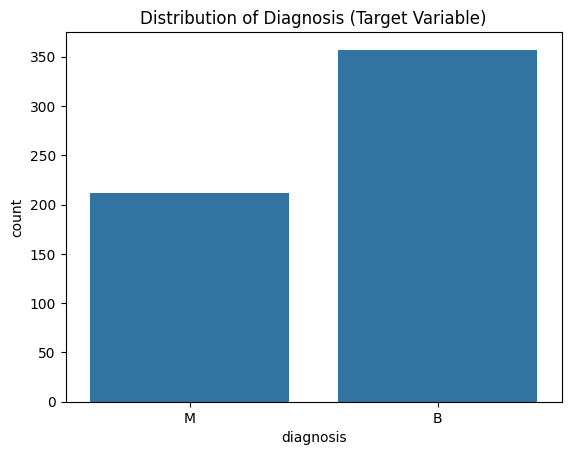

In [48]:
print("\nTarget Variable Distribution:\n", data['diagnosis'].value_counts())
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis (Target Variable)')
plt.show()

In [49]:
#drop columns
data = data.drop(columns=['Unnamed: 32']) # Remove the 'Unnamed: 32' column

Feature analysis

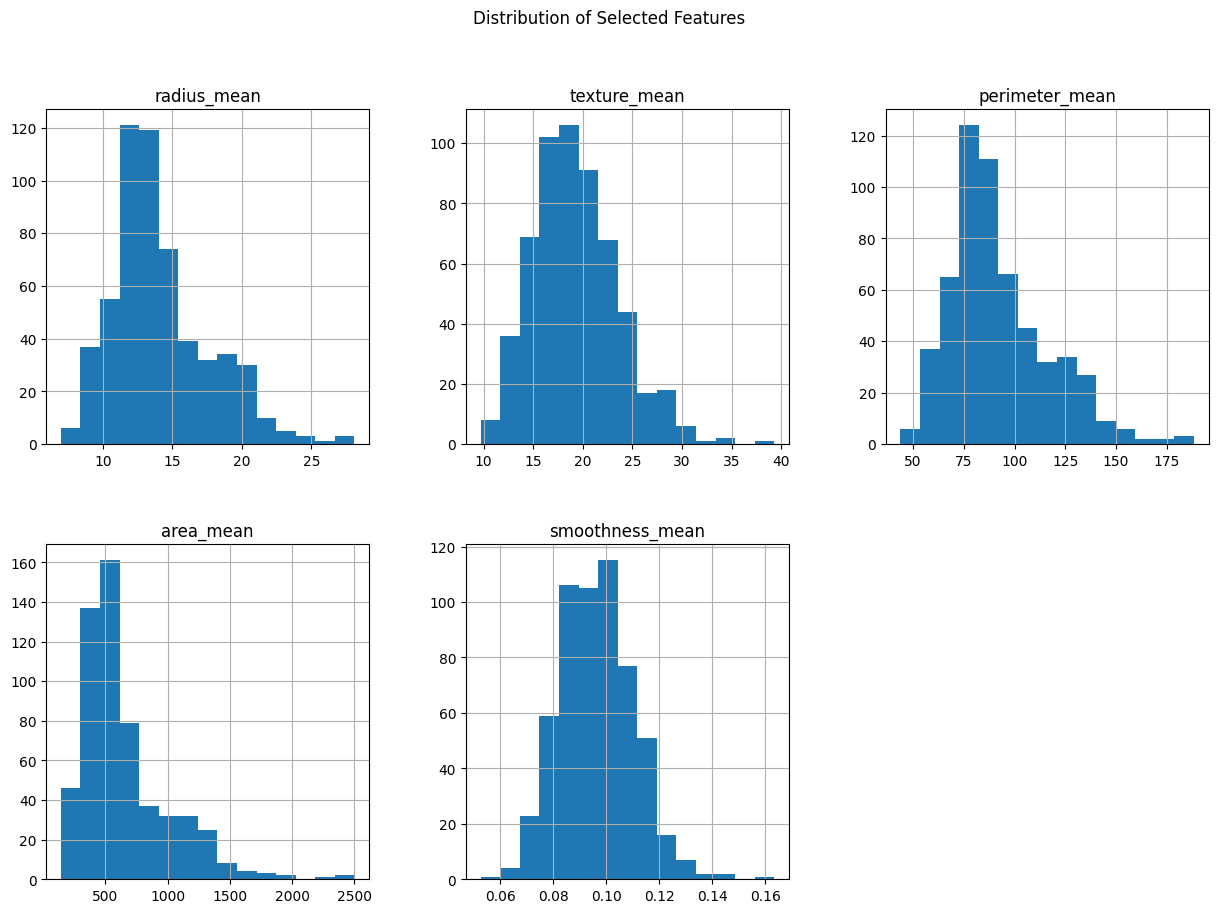

In [50]:
# Histogram of some selected features
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
data[features].hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Distribution of Selected Features')
plt.show()

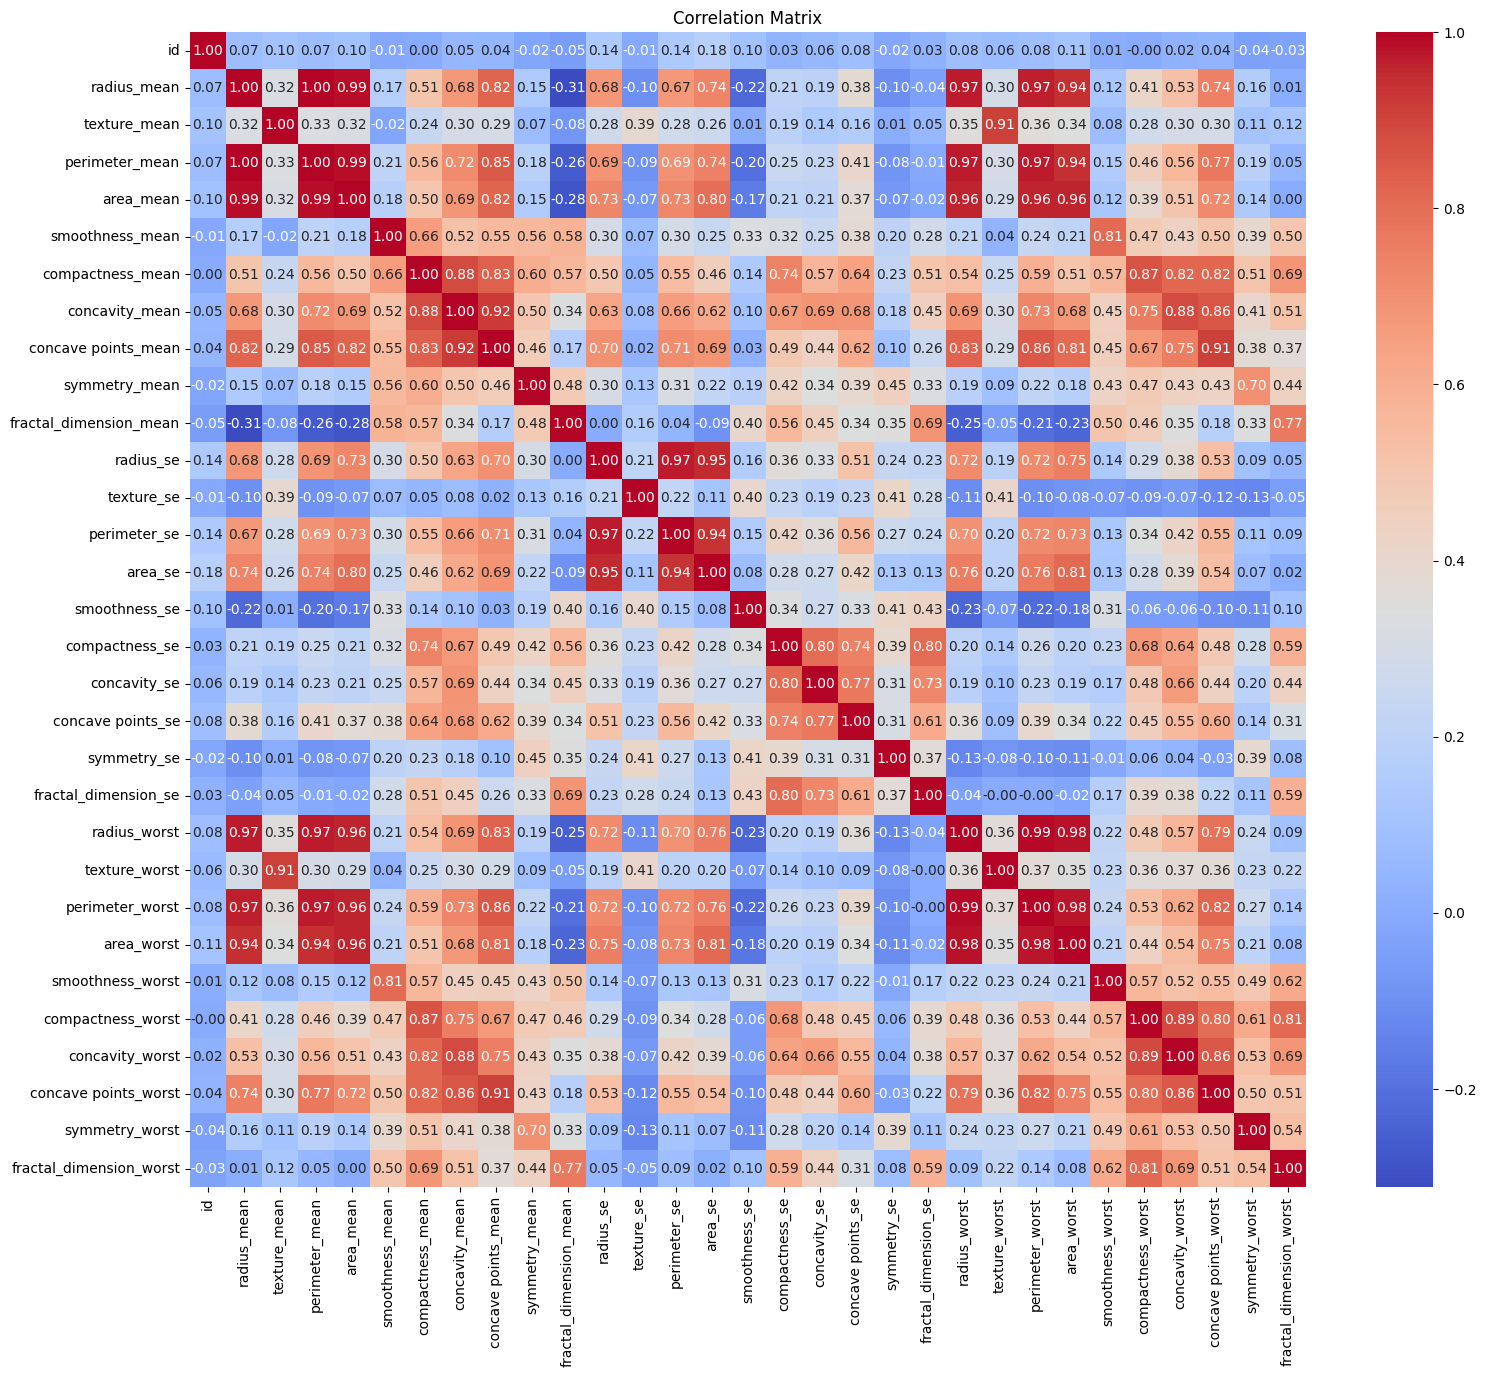

In [51]:
# Correlation matrix
numerical_data = data.select_dtypes(include=['float64', 'int64'])  # Select only numerical columns
correlation_matrix = numerical_data.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Pairplot for relationships between selected features¶

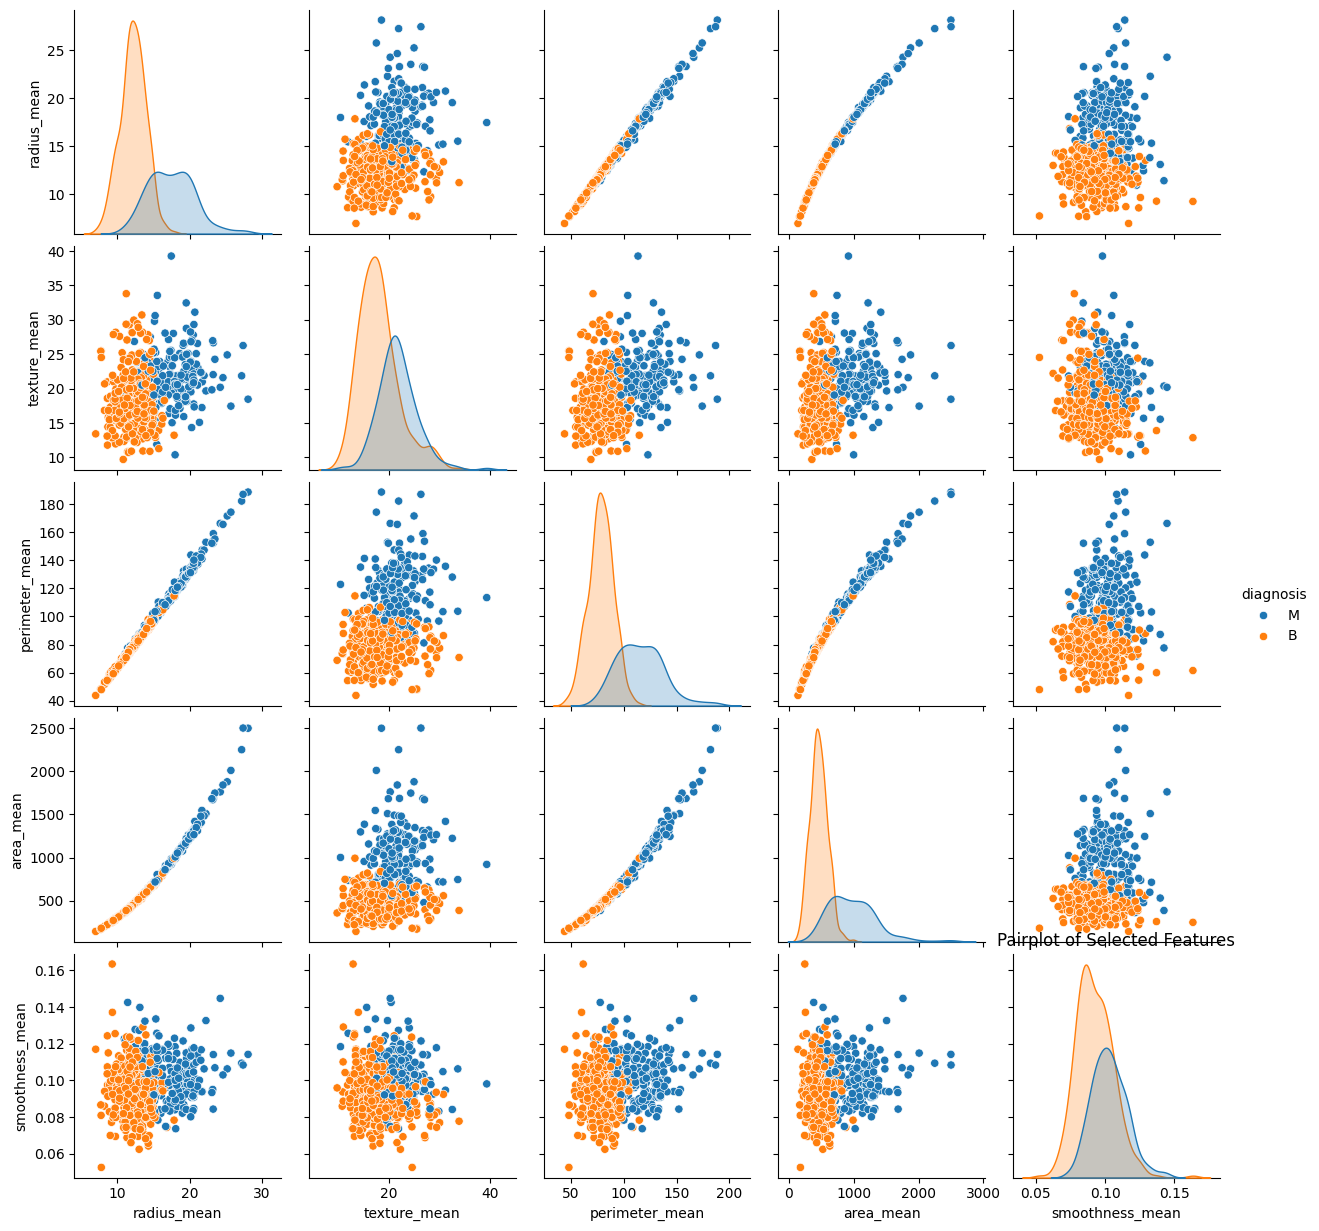

In [52]:
# Suppress specific warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']
sns.pairplot(data[selected_features], hue='diagnosis')
plt.title('Pairplot of Selected Features')
plt.show()

Correlations:

Strong positive correlations exist between radius_mean, perimeter_mean, and area_mean. This is shown by the nearly linear relationships in their scatter plots.
Texture_mean and smoothness_mean show weaker correlations with other features.

Feature Distributions:

The diagonal plots show the distribution of each feature. Most features have different distributions for malignant and benign cases.
Radius_mean, perimeter_mean, and area_mean show more pronounced bimodal distributions, with malignant cases generally having higher values.

Predictive Power:

Radius_mean, perimeter_mean, and area_mean appear to be strong predictors of malignancy, as they show the clearest separation between classes.
Texture_mean and smoothness_mean show some separation but with more overlap between classes.

Non-linear Relationships:

The relationship between area_mean and other features (like radius_mean) appears slightly non-linear, suggesting possible interactions or compound effects.

Need for Further Investigation:

While some features show clear patterns, others like smoothness_mean show less clear separation, warranting further investigation into their relevance or potential interactions with other features.



These interpretations suggest that the selected features, particularly those related to size (radius, perimeter, area), could be valuable in developing diagnostic tools or models for breast cancer detection. However, it's important to consider that this is just a visual analysis, and statistical tests would be needed to confirm these observations.

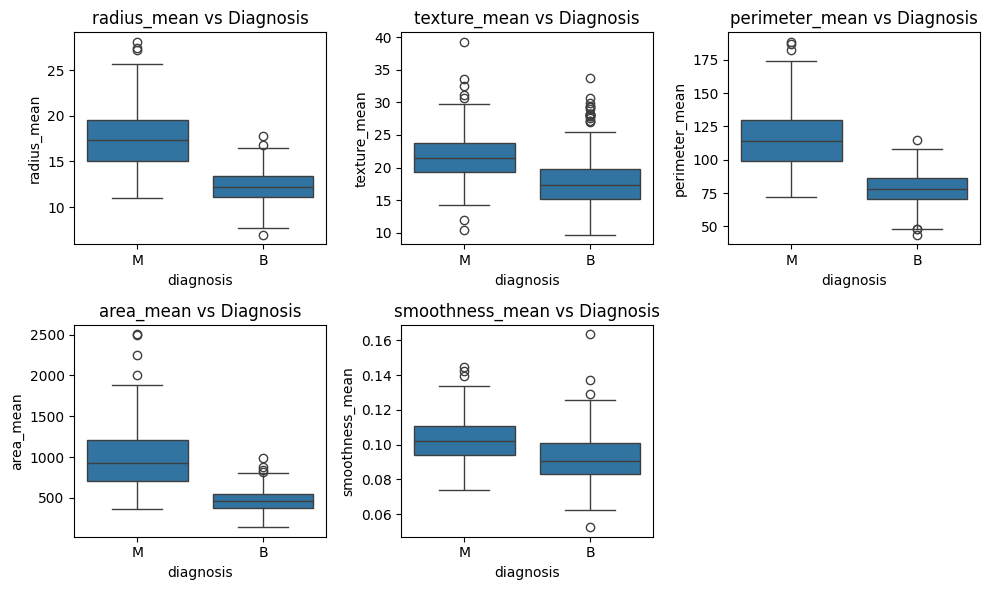

In [14]:
#boxplot
#boxplot
plt.figure(figsize=(10,6))
for index, feature in enumerate (features):
    plt.subplot(2,3,index+1) # Use index from enumerate
    sns.boxplot(x='diagnosis', y=feature, data=data)
    plt.title(f'{feature} vs Diagnosis')
plt.tight_layout()
plt.show()

Radius_mean:

Malignant tumors tend to have a larger mean radius.
There's less overlap between M and B, suggesting this feature is a good discriminator.
Malignant tumors show more variability in radius.




Texture_mean:

Malignant tumors generally have a higher mean texture.
There's considerable overlap between M and B, indicating this feature alone may not be as strong a predictor.
Both categories have several outliers.

Perimeter_mean:

Malignant tumors have notably larger mean perimeters.
There's clear separation between M and B, suggesting this is a strong predictive feature.
The spread for malignant tumors is larger.

Area_mean:

Malignant tumors have significantly larger mean areas.
This feature shows the most pronounced difference between M and B.
Malignant tumors have a much wider range and several high outliers.

Smoothness_mean:

Malignant tumors are slightly smoother on average.
There's substantial overlap between M and B, indicating this feature might be less useful for prediction on its own.
Both categories have outliers, especially on the higher end.

General observations:

Features related to size (radius, perimeter, area) show the clearest distinction between malignant and benign tumors.
Texture and smoothness show less clear separation, but still have some discriminative power.
Malignant tumors generally show more variability across all features.
There are outliers in both categories for most features, which may warrant further investigation.

These boxplots suggest that a combination of these features, especially those related to tumor size, could be effective in developing a diagnostic model. However, it's important to note that while these visual insights are valuable, they should be complemented with statistical tests to confirm the significance of these differences.

In [15]:
# Checking for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")


Number of Duplicate Rows: 0


Remove outliers using the Interquartile Range (IQR) method for each numerical column in dataset.¶
Calculate the IQR: For each numerical column, calculate the 1st quartile (Q1) and the 3rd quartile (Q3), then compute the IQR as IQR = Q3 - Q1.

Define the Outlier Boundaries: Typically, outliers are considered to be data points that lie below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

Filter Out the Outliers: Remove rows where any numerical feature has a value outside these boundaries

In [16]:
# Functuon to remove outliers based on IQR
def remove_outliers_iqr(df: pd.DataFrame) -> pd.DataFrame:
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

Certainly, I'll break down and explain this code:

```python
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
```

This line is doing several operations:

1. `(Q1 - 1.5 * IQR)`: This calculates the lower bound for what's considered an outlier. Q1 is the first quartile, and IQR is the interquartile range.

2. `(Q3 + 1.5 * IQR)`: This calculates the upper bound for what's considered an outlier. Q3 is the third quartile.

3. `(df < (Q1 - 1.5 * IQR))`: This creates a boolean mask where True indicates values below the lower bound.

4. `(df > (Q3 + 1.5 * IQR))`: This creates a boolean mask where True indicates values above the upper bound.

5. `|`: This operator combines the two conditions, so we get True for any value that's either below the lower bound or above the upper bound.

6. `.any(axis=1)`: This checks if any column in each row satisfies the condition (i.e., is an outlier).

7. `~`: This inverts the boolean mask, so we get True for rows that don't have any outliers.

8. `df[...]`: This filters the DataFrame, keeping only the rows where the boolean mask is True (i.e., rows without outliers).

9. The result is assigned to `df_clean`, which is a new DataFrame with outliers removed.

10. `return df_clean`: This returns the cleaned DataFrame.

This method effectively removes any row from the DataFrame that contains at least one value considered an outlier based on the IQR method. It's applying the outlier detection to all numeric columns simultaneously.

Would you like me to elaborate on any specific part of this explanation?

In [53]:
# Checking for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")

# Functuon to remove outliers based on IQR
def remove_outliers_iqr(df: pd.DataFrame) -> pd.DataFrame:
    # Select only numeric columns
    numeric_df = df.select_dtypes(include='number')

    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1
    # Filtering the data to remove outliers within the function
    data_clean = df[~((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return data_clean

# Call the function to clean the data
data_clean = remove_outliers_iqr(data) # Now Q1, Q3, and IQR are calculated and used within the function's scope


Number of Duplicate Rows: 0


In [54]:
# If you want to keep non-numerical columns after removing outliers:
non_numerical_data = data.select_dtypes(exclude=['float64', 'int64'])
data_cleaned = pd.concat([data_clean, non_numerical_data], axis=1) # Use 'data_clean' here

print(data_cleaned.shape)

(569, 33)


Explanation:¶
numerical_data = data.select_dtypes(include=['float64', 'int64']): This selects only the numerical columns from the dataset.

remove_outliers_iqr(): This function calculates the IQR for each numerical column, defines the outlier boundaries, and filters out rows containing outliers in any numerical column.

df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]: This line keeps rows that do not contain outliers in any numerical column.

Handling Non-Numerical Data: If your dataset contains non-numerical columns that you want to keep, the code concatenates the cleaned numerical data with the non-numerical columns after removing the outliers.

Notes:
Adjusting the IQR Multiplier: The multiplier 1.5 can be adjusted depending on how strict you want the outlier detection to be.
Impact on Dataset: After removing outliers, you may want to check the new shape of the dataset to understand the impact on the number of rows.

Explanation of the Steps:¶
Loading the Data: The dataset is loaded using pd.read_csv(), and basic details are displayed.
Data Overview: data.info() provides insights into data types, non-null values, etc. data.describe() shows statistical summaries.
Missing Values: We check for any missing values in the dataset.
Target Variable Analysis: We analyze the distribution of the target variable diagnosis using a count plot.
Feature Analysis: Univariate analysis of features through histograms and statistical summaries.
Correlation Analysis: The correlation matrix helps identify relationships between features, visualized using a heatmap.
Feature Distribution: Distribution of selected features with respect to the diagnosis column using boxplots.
Worst Features: We analyze the worst features (e.g., radius_worst, area_worst) through histograms and pairplots.
Data Cleaning: Duplicate rows and missing values are checked.

Full preprocessing pipeline¶
Handling Categorical Variables: We will use LabelEncoder for columns with more than 7 unique categories and OneHotEncoder for columns with fewer than 7 unique categories.
Scaling Numerical Variables: We will scale numerical features using MinMaxScaler to bring them to a common scale.
Handling Missing Values: If there are any missing values, we will handle them appropriately (imputation).
Splitting the Data: Finally, we will split the data into training and testing sets.

Drop the id from columns

Notes:¶
Adjusting the IQR Multiplier: The multiplier 1.5 can be adjusted depending on how strict you want the outlier detection to be.
Impact on Dataset: After removing outliers, you may want to check the new shape of the dataset to understand the impact on the number of rows.

Explanation of the Steps:¶
Loading the Data: The dataset is loaded using pd.read_csv(), and basic details are displayed.
Data Overview: data.info() provides insights into data types, non-null values, etc. data.describe() shows statistical summaries.
Missing Values: We check for any missing values in the dataset.
Target Variable Analysis: We analyze the distribution of the target variable diagnosis using a count plot.
Feature Analysis: Univariate analysis of features through histograms and statistical summaries.
Correlation Analysis: The correlation matrix helps identify relationships between features, visualized using a heatmap.
Feature Distribution: Distribution of selected features with respect to the diagnosis column using boxplots.
Worst Features: We analyze the worst features (e.g., radius_worst, area_worst) through histograms and pairplots.
Data Cleaning: Duplicate rows and missing values are checked.

Full preprocessing pipeline¶
Handling Categorical Variables: We will use LabelEncoder for columns with more than 7 unique categories and OneHotEncoder for columns with fewer than 7 unique categories.
Scaling Numerical Variables: We will scale numerical features using MinMaxScaler to bring them to a common scale.
Handling Missing Values: If there are any missing values, we will handle them appropriately (imputation).
Splitting the Data: Finally, we will split the data into training and testing sets.

In [55]:
data = data.drop(columns=['id'])

# Verify the updated columns
print("Updated columns in data:", data.columns)


Updated columns in data: Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


Impute missing numerical values with the mean
num_imputer = SimpleImputer(strategy='mean')
Impute missing categorical values with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')

One-Hot Encoding using OneHotEncoder¶
Target: M - Malignant B - Benign

In [56]:
# Replace 'M' with 1 and 'B' with 0
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Check the updated DataFrame
print(data['diagnosis'].head())

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64


Splitting of the dataset into x and y variables

In [21]:
x=data.drop(columns=['diagnosis'],axis=1)
y=data['diagnosis']

Splitting into train and test sets

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
# Print columns in X_train to verify
print("Columns in X_train:", x_train.columns)

Columns in X_train: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


Scaling Numerical Features

In [24]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

Explanation of the Steps:¶
Identify Categorical and Numerical Columns: The dataset is split into categorical and numerical columns using select_dtypes().
Encoding Categorical Variables:
LabelEncoder is used for columns with more than 7 unique categories.
OneHotEncoder is used for columns with 7 or fewer unique categories.
Handle Missing Values:
For numerical columns, missing values are imputed with the mean.
For categorical columns, missing values are imputed with the most frequent value.
Scaling Numerical Features: We use MinMaxScaler to scale all numerical features to a range of 0 to 1.
Preprocessing Pipeline: The pipeline includes imputation and scaling for numerical features, and imputation and encoding for categorical features.
Data Splitting: The data is split into training and testing sets using train_test_split().
Target Variable Encoding: The target variable diagnosis is encoded using One-Hot Encoder.

Machine Learning Models¶
Below is a list of common machine learning models used for classification tasks, grouped by categories such as linear models, tree-based models, ensemble models, etc. For each model, I will provide a brief explanation and some notes on when to use it.
1. Linear Models
Logistic Regression:

Description: A linear model that estimates the probability of a binary outcome using the logistic function.
When to Use: Works well for linearly separable data; interpretable and fast.

Linear Discriminant Analysis (LDA):

Description: Assumes that the data follows a Gaussian distribution and maximizes the separation between classes.
When to Use: Useful when the assumptions of normality are met, and the data is linearly separable.
Ridge Classifier:

Description: A variant of logistic regression with L2 regularization to prevent overfitting.
When to Use: Useful when dealing with multicollinearity or noisy data.

2. Tree-Based Models¶
Decision Trees:

Description: A non-linear model that splits the data into subsets using decision rules based on features.
When to Use: Good for both binary and multiclass classification; can capture complex relationships but may overfit on small datasets.
Random Forest:

Description: An ensemble of decision trees where each tree is trained on a random subset of features and samples.
When to Use: Reduces overfitting compared to a single decision tree and performs well on a variety of data.
Gradient Boosting Machines (GBM):

Description: Builds decision trees sequentially, where each tree tries to correct the errors of the previous one.
When to Use: High accuracy and robustness, but may require careful tuning of hyperparameters.
XGBoost:

Description: An optimized implementation of gradient boosting that is faster and more efficient.
When to Use: When you need a fast, accurate model with good handling of missing data.

LightGBM:

Description: A gradient boosting framework that uses a histogram-based approach for faster training and better memory usage.
When to Use: Best suited for large datasets with a high number of features.
CatBoost:

Description: A gradient boosting algorithm that handles categorical variables more effectively.
When to Use: When you have categorical features and want to avoid heavy preprocessing.

CatBoost:

Description: A gradient boosting algorithm that handles categorical variables more effectively.
When to Use: When you have categorical features and want to avoid heavy preprocessing.
3. Ensemble Methods
AdaBoost:

Description: Combines weak learners (typically decision trees) to create a strong classifier by iteratively adjusting the weights of misclassified samples.
When to Use: Good for handling imbalanced data and improving accuracy.


oting Classifier:

Description: Combines predictions from multiple models (e.g., logistic regression, decision tree, SVM) by voting (majority or weighted).
When to Use: When you want to combine the strengths of multiple models for improved performance.
Bagging Classifier:

Description: Uses bootstrapping to train multiple models (e.g., decision trees) on random subsets of the data and averages their predictions.
When to Use: Reduces overfitting and variance compared to individual models.
4. Support Vector Machines (SVM)
Support Vector Classifier (SVC):
Description: A linear or non-linear classifier that tries to maximize the margin between classes.
When to Use: Works well for small to medium-sized datasets with a clear margin of separation.

. K-Nearest Neighbors (KNN)¶
K-Nearest Neighbors:
Description: A non-parametric model that classifies data points based on the majority class of their nearest neighbors.
When to Use: Simple and effective for small datasets; struggles with large or high-dimensional data.

. K-Nearest Neighbors (KNN)¶
K-Nearest Neighbors:
Description: A non-parametric model that classifies data points based on the majority class of their nearest neighbors.
When to Use: Simple and effective for small datasets; struggles with large or high-dimensional data.

7. Neural Networks¶
Multi-Layer Perceptron (MLP):

Description: A feedforward neural network with one or more hidden layers.
When to Use: Suitable for both binary and multiclass classification, particularly for large datasets with complex patterns.
Convolutional Neural Networks (CNN):

Description: A neural network architecture designed for spatial data (e.g., images).
When to Use: Primarily used for image classification tasks.
Recurrent Neural Networks (RNN):

Description: A neural network architecture designed for sequential data (e.g., time series, text).
When to Use: Best suited for sequence classification tasks like sentiment analysis.

8. Probabilistic Models¶
Gaussian Process Classifier:
Description: A non-parametric model that provides a probabilistic approach to classification by modeling the data as a Gaussian distribution.
When to Use: Effective when you need uncertainty estimation along with predictions.

9. Others¶
Extreme Learning Machines (ELM):

Description: A type of feedforward neural network that provides fast training by randomly assigning weights and biases.
When to Use: Suitable for real-time applications requiring fast model training.
Quadratic Discriminant Analysis (QDA):

Description: Similar to LDA but allows for each class to have its own covariance matrix.
When to Use: When the assumption of shared covariance (as in LDA) does not hold.

Considerations:¶
Model Selection: The choice of model depends on your dataset size, feature types, and the complexity of the decision boundaries.
Performance Tuning: Most models require tuning of hyperparameters (e.g., regularization strength, tree depth, learning rate) to achieve optimal performance.
Evaluation: Always use proper evaluation metrics (e.g., accuracy, precision, recall, F1-score, AUC) and cross-validation to assess your model’s performance.

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [58]:
#model selection
#initialise classifiers
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

Train and evaluate each model

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, matthews_corrcoef, log_loss
# ... (your existing imports and model definitions)

# Use your existing split data
# x_train, x_test, y_train, y_test are already defined

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)  # Use the same scaler fitted on training data

for model_name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred) # make sure you import accuracy_score
    print(f'{model_name} Accuracy: {accuracy}')

Logistic Regression Accuracy: 0.9736842105263158
Support Vector Machine Accuracy: 0.9824561403508771
Decision Tree Accuracy: 0.9385964912280702
Random Forest Accuracy: 0.9649122807017544
K-Nearest Neighbors Accuracy: 0.9473684210526315
Naive Bayes Accuracy: 0.9649122807017544
Gradient Boosting Accuracy: 0.956140350877193


In [60]:
for model_name, model in models.items():
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy}')

Logistic Regression Accuracy: 0.9736842105263158
Support Vector Machine Accuracy: 0.9824561403508771
Decision Tree Accuracy: 0.9473684210526315
Random Forest Accuracy: 0.9649122807017544
K-Nearest Neighbors Accuracy: 0.9473684210526315
Naive Bayes Accuracy: 0.9649122807017544
Gradient Boosting Accuracy: 0.956140350877193


Making predictions

In [61]:
y_pred = model.predict(x_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

Evaluation metrics

In [62]:
# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'
conf_matrix = confusion_matrix(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
log_loss_value = log_loss(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'

